In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/Final_year_project/5_cls.zip

Archive:  /content/drive/MyDrive/Final_year_project/5_cls.zip
  inflating: 5_cls/discription.txt   
   creating: 5_cls/test/
   creating: 5_cls/test/cataract/
  inflating: 5_cls/test/cataract/10_JPG_jpg.rf.71aa847d03aeaac1f45031187a950b8b.jpg  
  inflating: 5_cls/test/cataract/11_JPG_jpg.rf.8067a193cb439e447e052ddb56f25254.jpg  
  inflating: 5_cls/test/cataract/11_JPG_jpg.rf.c8be22ccffefdd94fe30c7037f434d47.jpg  
  inflating: 5_cls/test/cataract/12_jpg.rf.5c479c57e5106609361b54815f637de9.jpg  
  inflating: 5_cls/test/cataract/13_jpg.rf.fdf261a3cb970035f83ae5a0c56f3d05.jpg  
  inflating: 5_cls/test/cataract/13_JPG_jpg.rf.b15332d10dce8ee102ce78ced867023b.jpg  
  inflating: 5_cls/test/cataract/14_jpg.rf.6cd4c8f520cc3e17c4d19edac9b8410a.jpg  
  inflating: 5_cls/test/cataract/14_jpg.rf.706c5a49e2f17f71070907f6b7407e6f.jpg  
  inflating: 5_cls/test/cataract/15_jpg.rf.2e255cf78204e94b49ada7b89a5be7b4.jpg  
  inflating: 5_cls/test/cataract/15_jpg.rf.f3ded639e6a90391ac5ea8f37bc436c4.jpg  
  inf

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout,GlobalAveragePooling2D

In [5]:
train_path = "/content/5_cls/train"
test_path = "/content/5_cls/test"
val_path = "/content/5_cls/val"

In [6]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
val_datagen = ImageDataGenerator(rescale=1/255)

In [7]:
train_data = train_datagen.flow_from_directory(directory=train_path,target_size=(224,224),shuffle=True,seed=42,batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_path,target_size=(224,224),seed=42)
val_data = val_datagen.flow_from_directory(directory=val_path,target_size=(224,224),seed=42)

Found 1205 images belonging to 5 classes.
Found 156 images belonging to 5 classes.
Found 148 images belonging to 5 classes.


# VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
base_model_vgg = VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model_vgg.trainable = False

In [ ]:
base_model_vgg.trainable_variables

[]

In [ ]:
model_vgg = Sequential([
    base_model_vgg,
    Flatten(),
    Dense(50,activation='relu'),
    Dense(20,activation='relu'),
    Dense(5, activation='softmax')
])

In [ ]:
model_vgg.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [ ]:
history_vgg = model_vgg.fit(train_data,epochs=20,shuffle=True,validation_data=val_data)

Epoch 1/20
38/38 [==============================] - 10s 229ms/step - loss: 1.3523 - accuracy: 0.4365 - val_loss: 1.0153 - val_accuracy: 0.6216
Epoch 2/20
38/38 [==============================] - 9s 223ms/step - loss: 0.7635 - accuracy: 0.7303 - val_loss: 0.8341 - val_accuracy: 0.7162
Epoch 3/20
38/38 [==============================] - 8s 214ms/step - loss: 0.5139 - accuracy: 0.8307 - val_loss: 0.6198 - val_accuracy: 0.8041
Epoch 4/20
38/38 [==============================] - 8s 207ms/step - loss: 0.3175 - accuracy: 0.9104 - val_loss: 0.5862 - val_accuracy: 0.8041
Epoch 5/20
38/38 [==============================] - 8s 211ms/step - loss: 0.2192 - accuracy: 0.9502 - val_loss: 0.5644 - val_accuracy: 0.7838
Epoch 6/20
38/38 [==============================] - 9s 224ms/step - loss: 0.1509 - accuracy: 0.9685 - val_loss: 0.5665 - val_accuracy: 0.8581
Epoch 7/20
38/38 [==============================] - 8s 215ms/step - loss: 0.0975 - accuracy: 0.9817 - val_loss: 0.5278 - val_accuracy: 0.8784
Epoch

In [ ]:
model_vgg.evaluate(test_data)

5/5 [==============================] - 7s 2s/step - loss: 0.3707 - accuracy: 0.8974


[0.37069177627563477, 0.8974359035491943]

In [8]:
import matplotlib.pyplot as plt

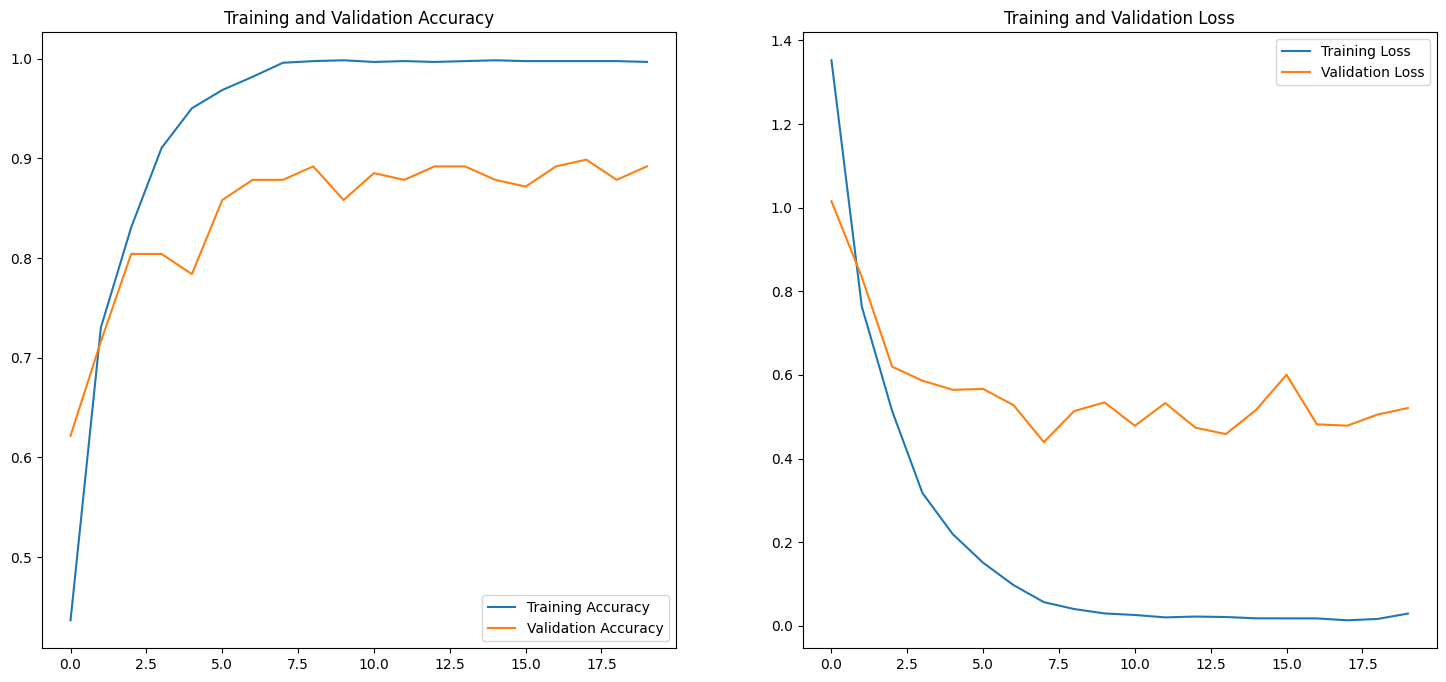

In [ ]:
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']

loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
base_model_vgg.trainable = True

In [ ]:
for layer in base_model_vgg.layers[15:]:
  layer.trainable = False


In [ ]:
base_learning_rate = 0.0001
model_vgg.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10))

In [ ]:
history_vgg_fine = model_vgg.fit(train_data,epochs=40,initial_epoch=history_vgg.epoch[-1],shuffle=True,validation_data=val_data)

Epoch 20/40
38/38 [==============================] - 21s 479ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.6411 - val_accuracy: 0.8851
Epoch 21/40
38/38 [==============================] - 17s 453ms/step - loss: 0.0050 - accuracy: 0.9967 - val_loss: 0.6851 - val_accuracy: 0.8986
Epoch 22/40
38/38 [==============================] - 17s 439ms/step - loss: 0.0051 - accuracy: 0.9967 - val_loss: 0.6672 - val_accuracy: 0.8919
Epoch 23/40
38/38 [==============================] - 18s 474ms/step - loss: 0.0045 - accuracy: 0.9975 - val_loss: 0.6664 - val_accuracy: 0.8986
Epoch 24/40
38/38 [==============================] - 18s 483ms/step - loss: 0.0048 - accuracy: 0.9975 - val_loss: 0.6423 - val_accuracy: 0.8919
Epoch 25/40
38/38 [==============================] - 17s 444ms/step - loss: 0.0044 - accuracy: 0.9975 - val_loss: 0.6735 - val_accuracy: 0.8919
Epoch 26/40
38/38 [==============================] - 17s 449ms/step - loss: 0.0047 - accuracy: 0.9975 - val_loss: 0.6547 - val_accuracy:

In [ ]:
model_vgg.evaluate(test_data)

5/5 [==============================] - 1s 183ms/step - loss: 0.3815 - accuracy: 0.9231


[0.381523996591568, 0.9230769276618958]

In [ ]:
#model_vgg.save("/content/drive/MyDrive/Final_year_project/vgg.keras")

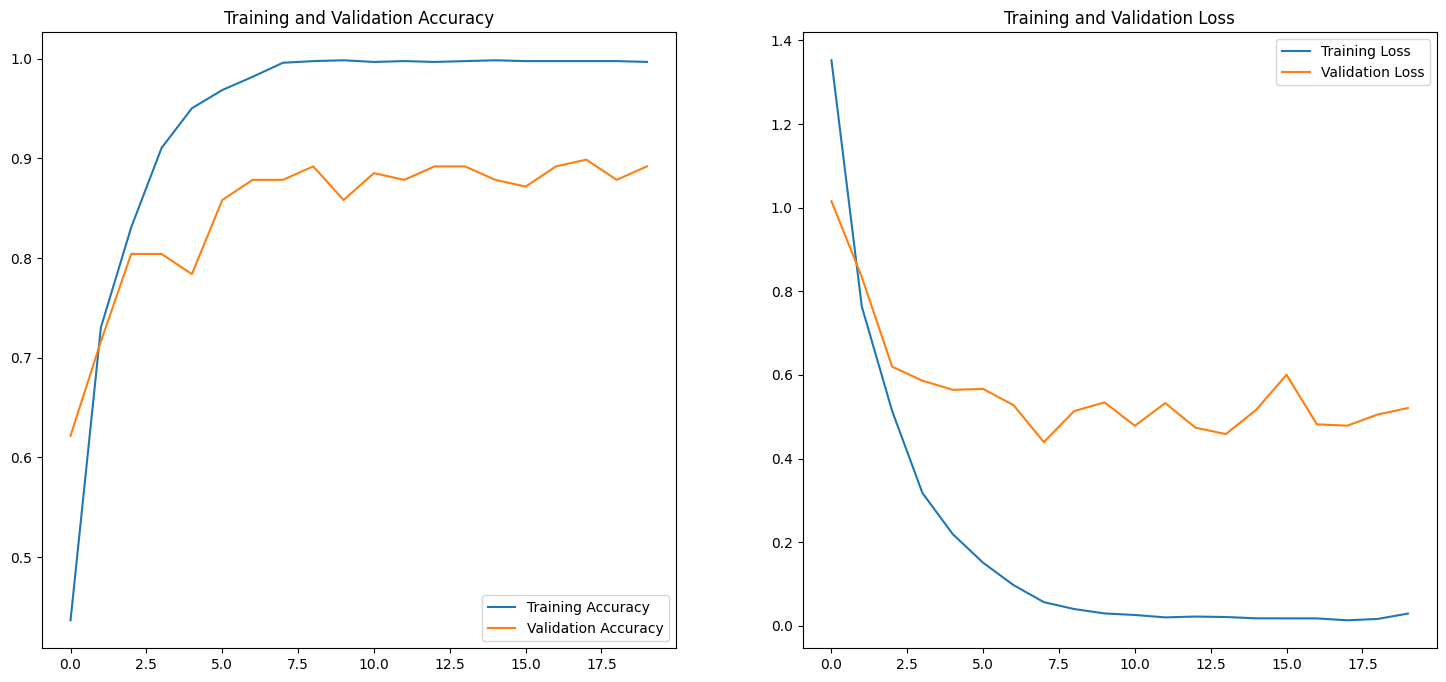

In [ ]:
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']

loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
from sklearn.metrics import classification_report

In [ ]:
pred = model_vgg.predict(test_data).argmax(axis=1)

5/5 [==============================] - 1s 161ms/step


In [ ]:
print(classification_report(test_data.labels,pred))

              precision    recall  f1-score   support

           0       0.26      0.25      0.26        44
           1       0.32      0.30      0.31        20
           2       0.37      0.42      0.39        52
           3       0.12      0.11      0.12        18
           4       0.05      0.05      0.05        22

    accuracy                           0.27       156
   macro avg       0.22      0.23      0.22       156
weighted avg       0.26      0.27      0.26       156



In [10]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(test_data.labels,pred)

array([[11,  5, 18,  4,  6],
       [ 5,  6,  4,  3,  2],
       [14,  4, 22,  5,  7],
       [ 6,  1,  6,  2,  3],
       [ 6,  3, 10,  2,  1]])

# MobileNet

In [67]:
from keras.applications import MobileNet


In [90]:
IMG_SHAPE = (224,224,3)
base_model_mobilenet = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model_mobilenet.trainable = False

In [91]:
model_mobile = Sequential([
    base_model_mobilenet,
    Flatten(),
    Dense(50,activation='relu'),
    Dense(20,activation='relu'),
    Dense(5, activation='softmax')
])

In [ ]:
len(base_model_mobilenet.layers)

154

In [92]:
model_mobile.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [93]:
history_mobile = model_mobile.fit(train_data,epochs=20,shuffle=True,validation_data=val_data)

Epoch 1/20
38/38 [==============================] - 11s 219ms/step - loss: 1.9038 - accuracy: 0.5544 - val_loss: 0.7098 - val_accuracy: 0.7905
Epoch 2/20
38/38 [==============================] - 7s 188ms/step - loss: 0.3313 - accuracy: 0.8913 - val_loss: 0.5498 - val_accuracy: 0.8581
Epoch 3/20
38/38 [==============================] - 8s 203ms/step - loss: 0.1002 - accuracy: 0.9701 - val_loss: 0.7036 - val_accuracy: 0.8649
Epoch 4/20
38/38 [==============================] - 9s 249ms/step - loss: 0.0643 - accuracy: 0.9892 - val_loss: 0.4687 - val_accuracy: 0.8851
Epoch 5/20
38/38 [==============================] - 10s 249ms/step - loss: 0.0440 - accuracy: 0.9967 - val_loss: 0.4681 - val_accuracy: 0.9122
Epoch 6/20
38/38 [==============================] - 8s 212ms/step - loss: 0.0366 - accuracy: 0.9950 - val_loss: 0.5246 - val_accuracy: 0.8851
Epoch 7/20
38/38 [==============================] - 8s 203ms/step - loss: 0.0203 - accuracy: 0.9975 - val_loss: 0.4915 - val_accuracy: 0.8986
Epoc

In [94]:
model_mobile.evaluate(test_data)

5/5 [==============================] - 1s 157ms/step - loss: 0.4744 - accuracy: 0.8910


[0.47441643476486206, 0.8910256624221802]

In [ ]:
#model_mobile.save("/content/drive/MyDrive/Final_year_project/mobilenet.keras")

In [95]:
import matplotlib.pyplot as plt

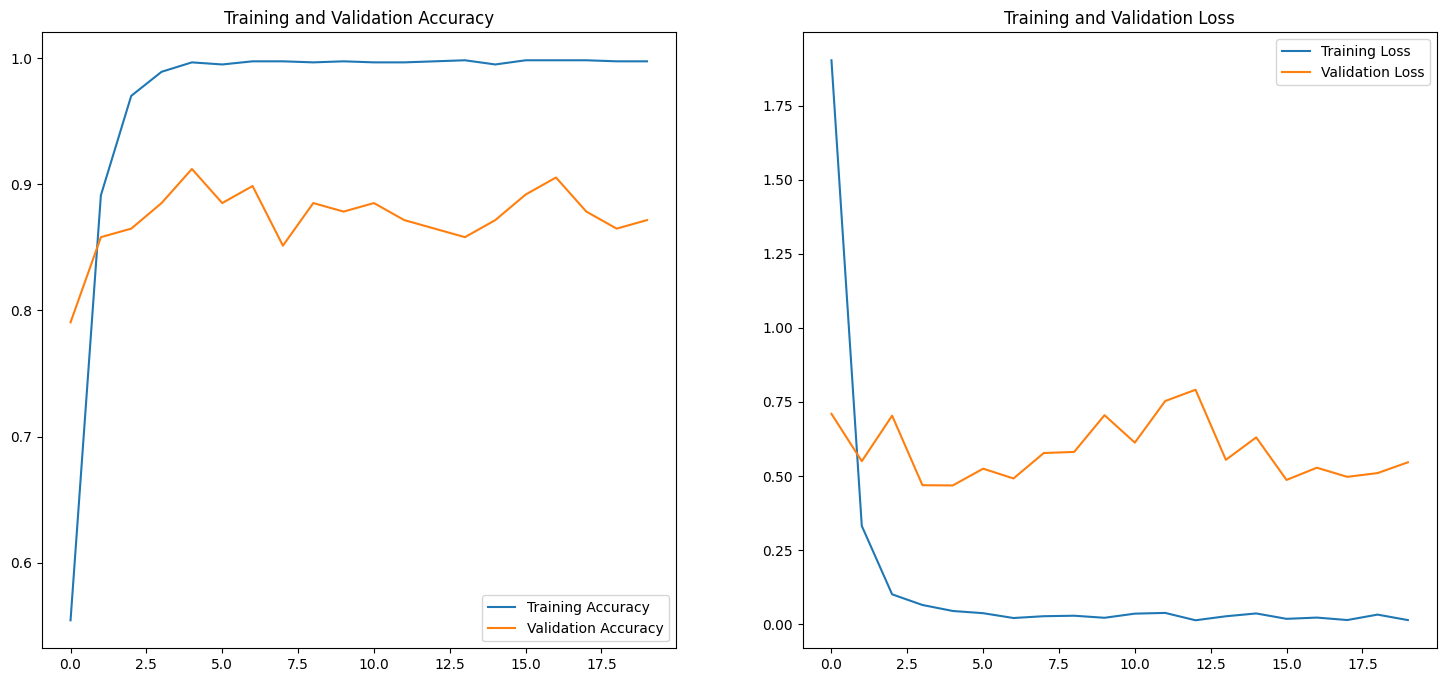

In [96]:
acc = history_mobile.history['accuracy']
val_acc = history_mobile.history['val_accuracy']

loss = history_mobile.history['loss']
val_loss = history_mobile.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [97]:
base_model_mobilenet.trainable = True

In [98]:
for layer in base_model_mobilenet.layers[151:]:
  layer.trainable = False


In [99]:
base_learning_rate = 0.0001
model_mobile.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10))

In [100]:
history_mobile = model_mobile.fit(train_data,epochs=10,shuffle=True,validation_data=val_data)

Epoch 1/10
38/38 [==============================] - 23s 215ms/step - loss: 1.2486 - accuracy: 0.6647 - val_loss: 0.5289 - val_accuracy: 0.8716
Epoch 2/10
38/38 [==============================] - 9s 226ms/step - loss: 0.6736 - accuracy: 0.7768 - val_loss: 0.5640 - val_accuracy: 0.8716
Epoch 3/10
38/38 [==============================] - 8s 202ms/step - loss: 0.4525 - accuracy: 0.8407 - val_loss: 0.5719 - val_accuracy: 0.8716
Epoch 4/10
38/38 [==============================] - 9s 233ms/step - loss: 0.3064 - accuracy: 0.8963 - val_loss: 0.5644 - val_accuracy: 0.8716
Epoch 5/10
38/38 [==============================] - 8s 216ms/step - loss: 0.2181 - accuracy: 0.9353 - val_loss: 0.5516 - val_accuracy: 0.8784
Epoch 6/10
38/38 [==============================] - 8s 204ms/step - loss: 0.1672 - accuracy: 0.9610 - val_loss: 0.5398 - val_accuracy: 0.8851
Epoch 7/10
38/38 [==============================] - 8s 213ms/step - loss: 0.1302 - accuracy: 0.9710 - val_loss: 0.5358 - val_accuracy: 0.8919
Epoch

In [101]:
model_mobile.evaluate(test_data)

5/5 [==============================] - 1s 195ms/step - loss: 0.3867 - accuracy: 0.9103


[0.38670891523361206, 0.9102563858032227]

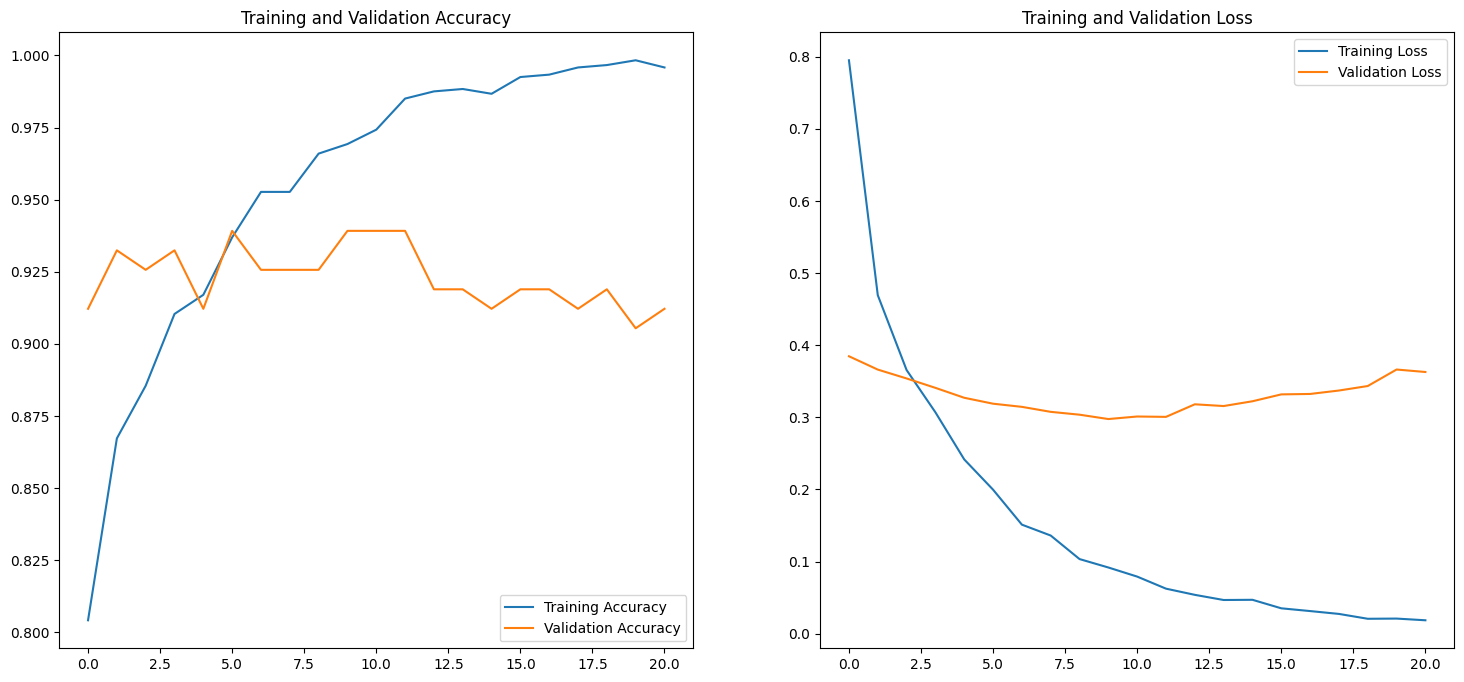

In [32]:
acc = history_mobile.history['accuracy']
val_acc = history_mobile.history['val_accuracy']

loss = history_mobile.history['loss']
val_loss = history_mobile.history['val_loss']

epochs_range = range(21)

plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
mobile_pred = model_mobile.predict(test_data).argmax(axis=1)

5/5 [==============================] - 3s 184ms/step


In [36]:
print(classification_report(test_data.labels,mobile_pred))

              precision    recall  f1-score   support

           0       0.22      0.20      0.21        44
           1       0.00      0.00      0.00        20
           2       0.30      0.33      0.31        52
           3       0.11      0.11      0.11        18
           4       0.20      0.18      0.19        22

    accuracy                           0.21       156
   macro avg       0.17      0.16      0.17       156
weighted avg       0.20      0.21      0.20       156



In [37]:
confusion_matrix(test_data.labels,mobile_pred)

array([[ 9,  5, 18,  7,  5],
       [ 8,  0,  7,  2,  3],
       [11,  9, 17,  8,  7],
       [ 7,  1,  7,  2,  1],
       [ 6,  5,  7,  0,  4]])

  # Xception

In [38]:
base_model_xcept = tf.keras.applications.xception.Xception(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model_xcept.trainable = False

In [39]:
model_xcept = Sequential([
    base_model_xcept,
    Flatten(),
    Dense(50,activation='relu'),
    Dense(20,activation='relu'),
    Dense(5, activation='softmax')
])

In [40]:
model_xcept.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [41]:
history_xcept = model_xcept.fit(train_data,epochs=20,shuffle=True,validation_data=val_data)

Epoch 1/20
38/38 [==============================] - 20s 350ms/step - loss: 2.4622 - accuracy: 0.5178 - val_loss: 1.2498 - val_accuracy: 0.6351
Epoch 2/20
38/38 [==============================] - 12s 309ms/step - loss: 0.7722 - accuracy: 0.7469 - val_loss: 0.9744 - val_accuracy: 0.7162
Epoch 3/20
38/38 [==============================] - 12s 308ms/step - loss: 0.3505 - accuracy: 0.8921 - val_loss: 0.8000 - val_accuracy: 0.8514
Epoch 4/20
38/38 [==============================] - 13s 350ms/step - loss: 0.1875 - accuracy: 0.9519 - val_loss: 0.7909 - val_accuracy: 0.8446
Epoch 5/20
38/38 [==============================] - 13s 347ms/step - loss: 0.1482 - accuracy: 0.9610 - val_loss: 0.8521 - val_accuracy: 0.8041
Epoch 6/20
38/38 [==============================] - 9s 222ms/step - loss: 0.1059 - accuracy: 0.9743 - val_loss: 0.7697 - val_accuracy: 0.8378
Epoch 7/20
38/38 [==============================] - 9s 227ms/step - loss: 0.0703 - accuracy: 0.9867 - val_loss: 0.7937 - val_accuracy: 0.8649
E

In [42]:
model_xcept.evaluate(test_data)

5/5 [==============================] - 4s 887ms/step - loss: 0.5928 - accuracy: 0.8590


[0.5927664041519165, 0.8589743375778198]

In [ ]:
import matplotlib.pyplot as plt

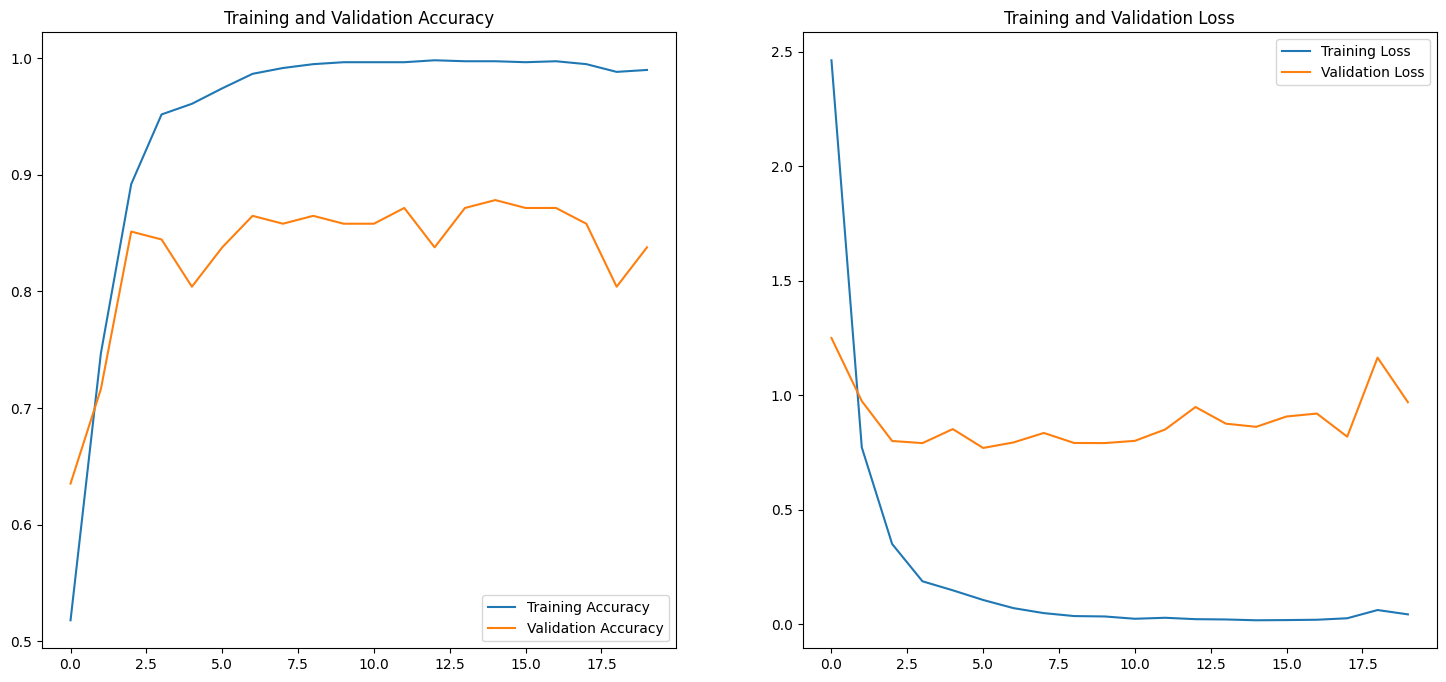

In [43]:
acc = history_xcept.history['accuracy']
val_acc = history_xcept.history['val_accuracy']

loss = history_xcept.history['loss']
val_loss = history_xcept.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
len(base_model_xcept.layers)

132

In [44]:
base_model_xcept.trainable = True

In [45]:
for layer in base_model_xcept.layers[100:]:
  layer.trainable = False


In [46]:
base_learning_rate = 0.0001
model_xcept.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10))

In [47]:
history_xcept = model_xcept.fit(train_data,epochs=40,initial_epoch=history_xcept.epoch[-1],shuffle=True,validation_data=val_data)

Epoch 20/40
38/38 [==============================] - 40s 599ms/step - loss: 1.3849 - accuracy: 0.7187 - val_loss: 1.1059 - val_accuracy: 0.7973
Epoch 21/40
38/38 [==============================] - 18s 467ms/step - loss: 0.6356 - accuracy: 0.8282 - val_loss: 1.1654 - val_accuracy: 0.7973
Epoch 22/40
38/38 [==============================] - 18s 475ms/step - loss: 0.3498 - accuracy: 0.8946 - val_loss: 1.1370 - val_accuracy: 0.7905
Epoch 23/40
38/38 [==============================] - 18s 471ms/step - loss: 0.1927 - accuracy: 0.9378 - val_loss: 1.0439 - val_accuracy: 0.8041
Epoch 24/40
38/38 [==============================] - 19s 473ms/step - loss: 0.1015 - accuracy: 0.9726 - val_loss: 0.9837 - val_accuracy: 0.8176
Epoch 25/40
38/38 [==============================] - 18s 471ms/step - loss: 0.0639 - accuracy: 0.9817 - val_loss: 0.9380 - val_accuracy: 0.7905
Epoch 26/40
38/38 [==============================] - 18s 472ms/step - loss: 0.0331 - accuracy: 0.9950 - val_loss: 0.8924 - val_accuracy:

In [48]:
model_xcept.evaluate(test_data)

5/5 [==============================] - 1s 164ms/step - loss: 0.9276 - accuracy: 0.8397


[0.927605152130127, 0.8397436141967773]

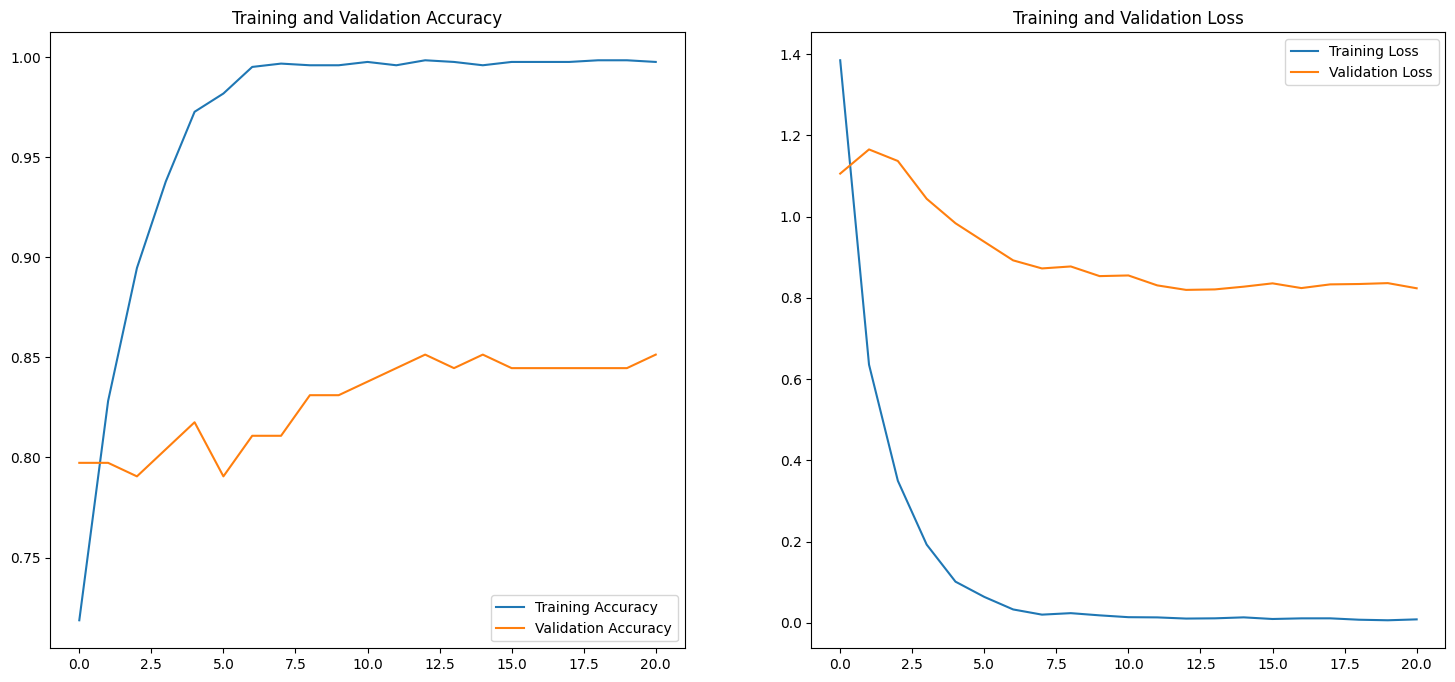

In [50]:
acc = history_xcept.history['accuracy']
val_acc = history_xcept.history['val_accuracy']

loss = history_xcept.history['loss']
val_loss = history_xcept.history['val_loss']

epochs_range = range(21)

plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [51]:
xcept_pred = model_xcept.predict(test_data).argmax(axis=1)

5/5 [==============================] - 2s 263ms/step


In [52]:
print(classification_report(test_data.labels,xcept_pred))

              precision    recall  f1-score   support

           0       0.26      0.27      0.27        44
           1       0.11      0.10      0.11        20
           2       0.34      0.37      0.35        52
           3       0.12      0.11      0.11        18
           4       0.16      0.14      0.15        22

    accuracy                           0.24       156
   macro avg       0.20      0.20      0.20       156
weighted avg       0.24      0.24      0.24       156



In [53]:
confusion_matrix(test_data.labels,xcept_pred)

array([[12,  7, 13,  8,  4],
       [ 7,  2,  5,  3,  3],
       [16,  6, 19,  3,  8],
       [ 5,  3,  7,  2,  1],
       [ 6,  0, 12,  1,  3]])